<a href="https://colab.research.google.com/github/martinasimeone/MLPNS_MSimeone/blob/main/lezione30_03_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import preprocessing
import scipy as sp
from scipy import spatial
import numpy as np
from sklearn import cluster

In [9]:
cmag = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS_FBianco/main/clustering/colormag_NGC2808.csv", header=None)
cmag

,0,1
0,-0.286449,19.920797
1,-0.273440,20.197264
2,-0.270112,19.915151
3,-0.243489,20.285819
4,-0.213538,19.689023
...,...,...
596,1.540265,17.014947
597,1.540265,18.009830
598,1.540265,19.012137
599,1.540265,20.007020


In [13]:
#vediamo se ci sono missing value
cmag.describe()

,0,1
count,601.000000,601.000000
mean,0.657683,18.751932
std,0.410194,1.320065
min,-0.286449,15.017758
25%,0.485623,17.930904
50%,0.753550,18.925512
75%,0.911292,19.911214
max,1.540265,21.016941


<Figure size 640x480 with 0 Axes>

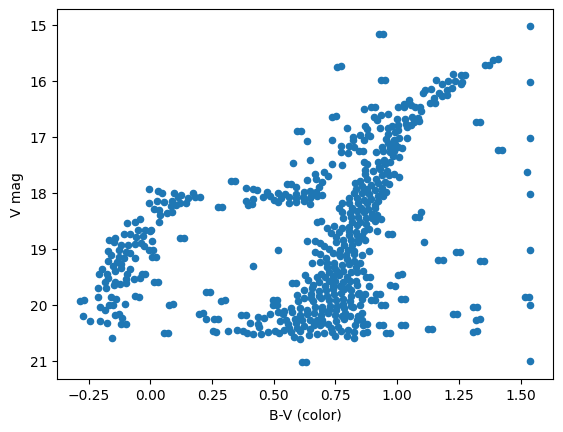

In [12]:
pl.figure()
ax = cmag.plot(x=0,y=1,kind='scatter')
ax.set_xlabel('B-V (color)')
ax.set_ylabel('V mag')
pl.gca().invert_yaxis();
#mi preoccupa che ci sono scale diverse

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 500x500 with 0 Axes>

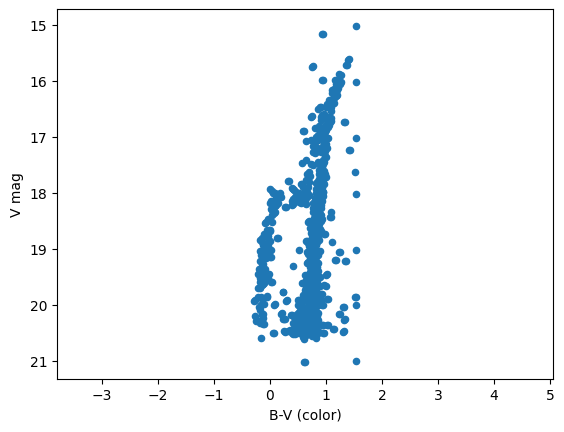

In [22]:
#faccio il plot con lo stesso range così lo vedo bene
pl.figure(figsize=(5,5))
ax = cmag.plot(x=0,y=1,kind='scatter')
ax.set_xlabel('B-V (color)')
ax.set_ylabel('V mag')
ax.axis('equal')
pl.gca().invert_yaxis();


In [20]:
#faccio scaling, assumo le variabili indipendenti
cmag_scaled = preprocessing.scale(cmag, axis=0)
#genero un array non un pandas dataframe
cmag_scaled

array([[-2.30358969,  0.88619766],
       [-2.27184885,  1.09580663],
       [-2.2637291 ,  0.88191773],
       ...,
       [ 2.15341438,  0.19727996],
       [ 2.15341438,  0.95156986],
       [ 2.15341438,  1.71148879]])

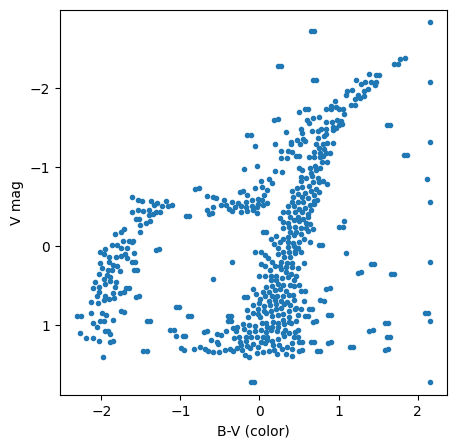

In [21]:
ax = pl.figure(figsize=(5,5)).add_subplot(111)
ax.plot(cmag_scaled[:,0], cmag_scaled[:,1], '.')
ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

pl.gca().invert_yaxis()

In [27]:
model = cluster.KMeans(n_clusters=3, random_state=302)

In [29]:
model.fit(cmag_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=302)

In [33]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [37]:
model.cluster_centers_
#è un oggetto nello spazio delle variebili, in questo caso ho la variabile colore e magnitudine

array([[ 0.2930383 ,  0.77187379],
       [ 0.62251398, -1.09094667],
       [-1.61167123,  0.31291912]])

In [38]:
model.inertia_

336.09752492000223

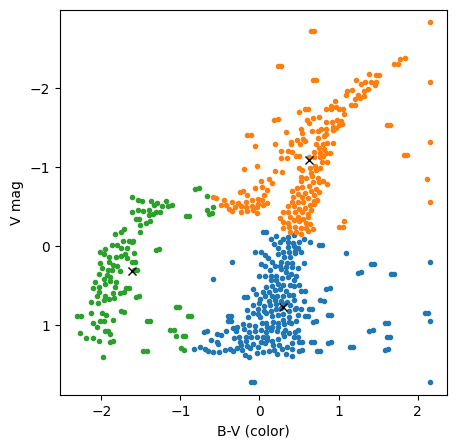

In [41]:
ax = pl.figure(figsize=(5,5)).add_subplot(111)
for i in range(3):
  ax.plot(cmag_scaled[model.labels_ == i,0], cmag_scaled[model.labels_ == i,1], '.')
  ax.plot(model.cluster_centers_[i,0], model.cluster_centers_[i,1],'kx')

ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

pl.gca().invert_yaxis()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

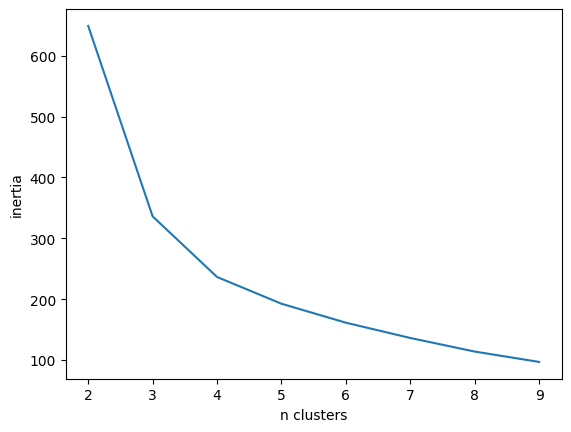

In [46]:
inertias = []
for nc in range (2,10):
  model = cluster.KMeans(n_clusters=nc, random_state=302).fit(cmag_scaled)
  inertias.append(model.inertia_)

pl.plot(range(2,10), inertias);
pl.ylabel("inertia");
pl.xlabel("n clusters");

In [47]:
#implementiamo il dbscan
cluster.DBSCAN?

In [60]:
#parametri iniziali suoi
modeldbs = cluster.DBSCAN(eps=0.23).fit(cmag_scaled)


In [61]:
modeldbs.labels_
#labels-1 identifica gli outliners

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,
       -1,  0,  0, -1,  0,  0,  0,  1,  0, -1,  1,  1,  1, -1,  1,  1,  0,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

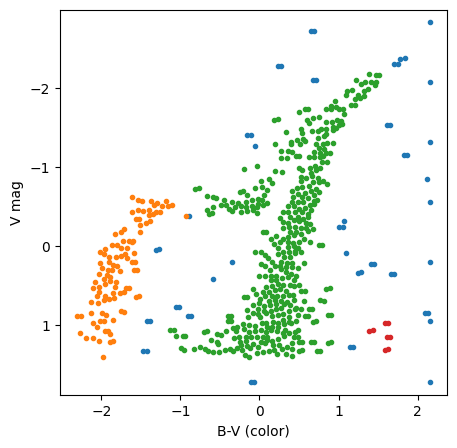

In [62]:
ax = pl.figure(figsize=(5,5)).add_subplot(111)
for i in np.unique(modeldbs.labels_):
  ax.plot(cmag_scaled[modeldbs.labels_ == i,0], cmag_scaled[modeldbs.labels_ == i,1], '.')

ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

pl.gca().invert_yaxis()

In [64]:
#dobbiamo definire un concetto di densità
for e in np.arange(0.001, 1, 0.001):
  modeldbs = cluster.DBSCAN(eps= e, min_samples = 10).fit(cmag_scaled)
  if modeldbs.labels_.max() > 0:
    print(e, modeldbs.labels_.max())
    # 1 vuol dire 2 cluster

#scelgo eps = 0.23 così ho 3 cluster

0.109 1
0.11 1
0.111 1
0.112 2
0.113 3
0.114 3
0.115 3
0.116 6
0.117 8
0.11800000000000001 10
0.11900000000000001 11
0.12000000000000001 12
0.121 12
0.122 12
0.123 13
0.124 13
0.125 9
0.126 6
0.127 6
0.128 7
0.129 7
0.13 6
0.131 6
0.132 5
0.133 5
0.134 5
0.135 5
0.136 5
0.137 5
0.138 4
0.139 3
0.14 3
0.14100000000000001 3
0.14200000000000002 4
0.14300000000000002 4
0.14400000000000002 4
0.14500000000000002 4
0.146 5
0.147 6
0.148 6
0.149 6
0.15 6
0.151 6
0.152 5
0.153 6
0.154 6
0.155 6
0.156 6
0.157 6
0.158 6
0.159 7
0.16 7
0.161 7
0.162 7
0.163 7
0.164 7
0.165 7
0.166 7
0.167 7
0.168 7
0.169 6
0.17 6
0.171 6
0.17200000000000001 6
0.17300000000000001 6
0.17400000000000002 5
0.17500000000000002 5
0.17600000000000002 5
0.177 5
0.178 5
0.179 4
0.18 4
0.181 4
0.182 4
0.183 4
0.184 4
0.185 3
0.186 3
0.187 3
0.188 3
0.189 3
0.19 3
0.191 3
0.192 3
0.193 3
0.194 3
0.195 3
0.196 3
0.197 3
0.198 2
0.199 2
0.2 2
0.201 2
0.202 2
0.203 2
0.20400000000000001 2
0.20500000000000002 2
0.206000000000000

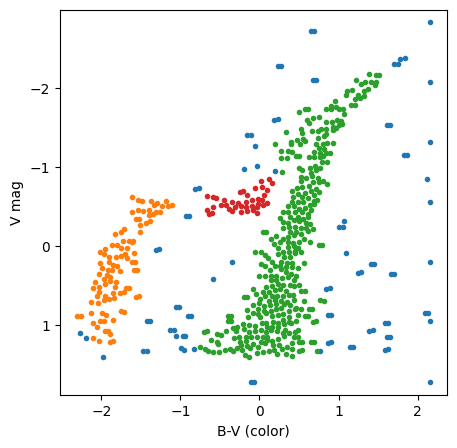

In [66]:
modeldbs = cluster.DBSCAN(eps=0.2, min_samples = 10).fit(cmag_scaled)

ax = pl.figure(figsize=(5,5)).add_subplot(111)
for i in np.unique(modeldbs.labels_):
  ax.plot(cmag_scaled[modeldbs.labels_ == i,0], cmag_scaled[modeldbs.labels_ == i,1], '.')

ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

pl.gca().invert_yaxis()